In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import TwoSlopeNorm, LogNorm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import geopandas as gpd
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from shapely.geometry import Polygon
sys.path.append("../mobility_data_analysis/")
# import mobility as mbl
from python_mobility import parameters as mp
from python_mobility import analysis as ma

my package for mobility extraction has been imported!


In [2]:
%run ./python_mobility/parameters.py
cluster_name

{0: 'Glocery&Pharmacies',
 1: 'Retails',
 2: 'Arts&Entertainment',
 3: 'Restaurants&Bars',
 4: 'Educations',
 5: 'Healthcares',
 6: 'others'}

In [13]:
visits_scores_wk = pd.read_csv('../data/unpivot_merged_data_raw_1to1_s.csv')

In [14]:
visits_scores_wk.columns

Index(['MODZCTA', 'mod_idx', 'week', 'Glocery&Pharmacies_visits_weekly',
       'Retails_visits_weekly', 'Arts&Entertainment_visits_weekly',
       'Restaurants&Bars_visits_weekly', 'Educations_visits_weekly',
       'Healthcares_visits_weekly', 'others_visits_weekly', 'score_mean',
       'score_median', 'score_std', 'gain_bias_mean', 'gain_bias_median',
       'gain_bias_std', 'loss_bias_mean', 'loss_bias_median', 'loss_bias_std',
       'loss_aversion_scores_mean', 'loss_aversion_scores_median',
       'loss_aversion_scores_std', 'rescale_avail_mean',
       'rescale_avail_median', 'rescale_avail_std', 'rescale_realistic_mean',
       'rescale_realistic_median', 'rescale_realistic_std', 'agency_mean',
       'agency_median', 'agency_std', 'regulated_tdscores_mean',
       'regulated_tdscores_median', 'regulated_tdscores_std',
       'regulated_agency_mean', 'regulated_agency_median',
       'regulated_agency_std', 'regulated_loss_mean', 'regulated_loss_median',
       'regulated_los

Glocery&Pharmacies
413.09037979074503
4392.734207172857
Retails
2528.7165877760203
12096.215035883615
Arts&Entertainment
1853.2930235830293
9268.75719428443
Restaurants&Bars
3872.8923398364295
19316.105188028945
Educations
424.20547645915207
7032.6162909862
Healthcares
509.69959729627413
6906.327842437792


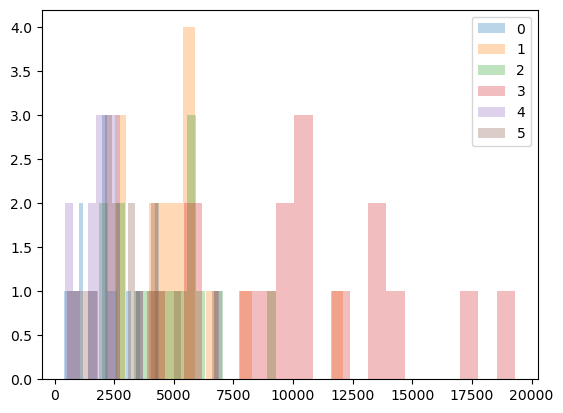

In [15]:
for c in range(6):
        c_name = mp.cluster_name[c]
        col_name = c_name+'_visits_weekly'
        visits_scores_wk[col_name] = visits_scores_wk[c_name+'_visits_weekly']
        # visits_scores_wk[col_name] = (visits_scores_wk[c_name+'_visits_weekly']/visits_scores_wk['Population'])*100
        plt.hist(visits_scores_wk[visits_scores_wk['week']==0][col_name], bins=20, alpha =0.3, label=c)
        print (c_name)
        print (np.min(visits_scores_wk[visits_scores_wk['week']==0][col_name]))
        print (np.max(visits_scores_wk[visits_scores_wk['week']==0][col_name]))
plt.legend()

In [16]:
from matplotlib.colors import Normalize
# norm_dict = {0: Normalize(vmin=0, vmax=6), 1: Normalize(vmin=0, vmax=13), 2: Normalize(vmin=0, vmax=13),
            #  3: Normalize(vmin=0, vmax=23), 4: Normalize(vmin=0, vmax=7), 5: Normalize(vmin=0, vmax=10)}

norm_dict = {0: Normalize(vmin=400, vmax=4000), 1: Normalize(vmin=400, vmax=12000), 2: Normalize(vmin=400, vmax=9000),
             3: Normalize(vmin=400, vmax=19000), 4: Normalize(vmin=100, vmax=7000), 5: Normalize(vmin=100, vmax=7000)}

In [6]:
gdf = gpd.read_file('../Data/geography_data/MODZCTA_2010.shp')
gdf['MODZCTA'] = gdf['MODZCTA'].astype(np.int64)
gdf_merged = gdf.merge(visits_scores_wk, on='MODZCTA', how='left')

In [7]:
week_str_ls = []
for wk_idx in range(51):  # Assuming you want to go up to '51'
    week_str = str(wk_idx).zfill(2) 
    week_str_ls.append(week_str)

In [17]:
dpi = 350
figsize = (12, 15)  # inches

filenames = []


for wk_idx in range(51):
    fig = plt.figure(figsize=figsize,dpi = dpi)  
    gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1], hspace=0.3, wspace=0.1)
    for c in range(6):
        c_name = mp.cluster_name[c]
        
        ax = plt.subplot(gs[c // 2, c % 2])
        gdf.plot(ax=ax, color='white', edgecolor='black',linewidth=0.1)
        norm = norm_dict[c]
        gdf_merged[gdf_merged['week']==wk_idx].plot(column=c_name + '_visits_weekly', cmap='coolwarm',norm=norm,legend=True, ax=ax)
    # Optional: Set title with the date or other relevant info
        subtitle_text = f"Visits to {c_name} in week " + week_str_ls[wk_idx]
        ax.set_title(subtitle_text)

        # ax.text(0.5, -0.1, subtitle_text, va='center', ha='center', transform=ax.transAxes, fontsize=10)
        ax.axis('off')

    # Save each frame to a file
    ## perpop_
    filename = f'../results/plots_maps/visit_gif/raw_visits/visits_{wk_idx}.png'
    plt.savefig(filename, bbox_inches='tight',pad_inches=0,dpi=dpi)
    filenames.append(filename)
    plt.close()

In [18]:
from PIL import Image, ImageSequence
frames = []
for filename in filenames:
    new_frame = Image.open(filename)
    frames.append(new_frame)

# Save into a GIF file
## visits_perpop
frames[0].save('../results/plots_maps/visit_gif/raw_visits/raw_visits.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300,  # duration between frames in milliseconds
               loop=0)  # loop forever

### scores

In [11]:
scores_title_dict = {'regulated_tdscores_median':'(a).Median Temporal Discounting Scores', 'regulated_loss_median':'(b). Median Loss Aversion Scores', 'regulated_agency_median':'(c). Median Agency Scores'}

56.25
68.75
50.0
66.66666666666667
59.72222222222222
82.14285714285714


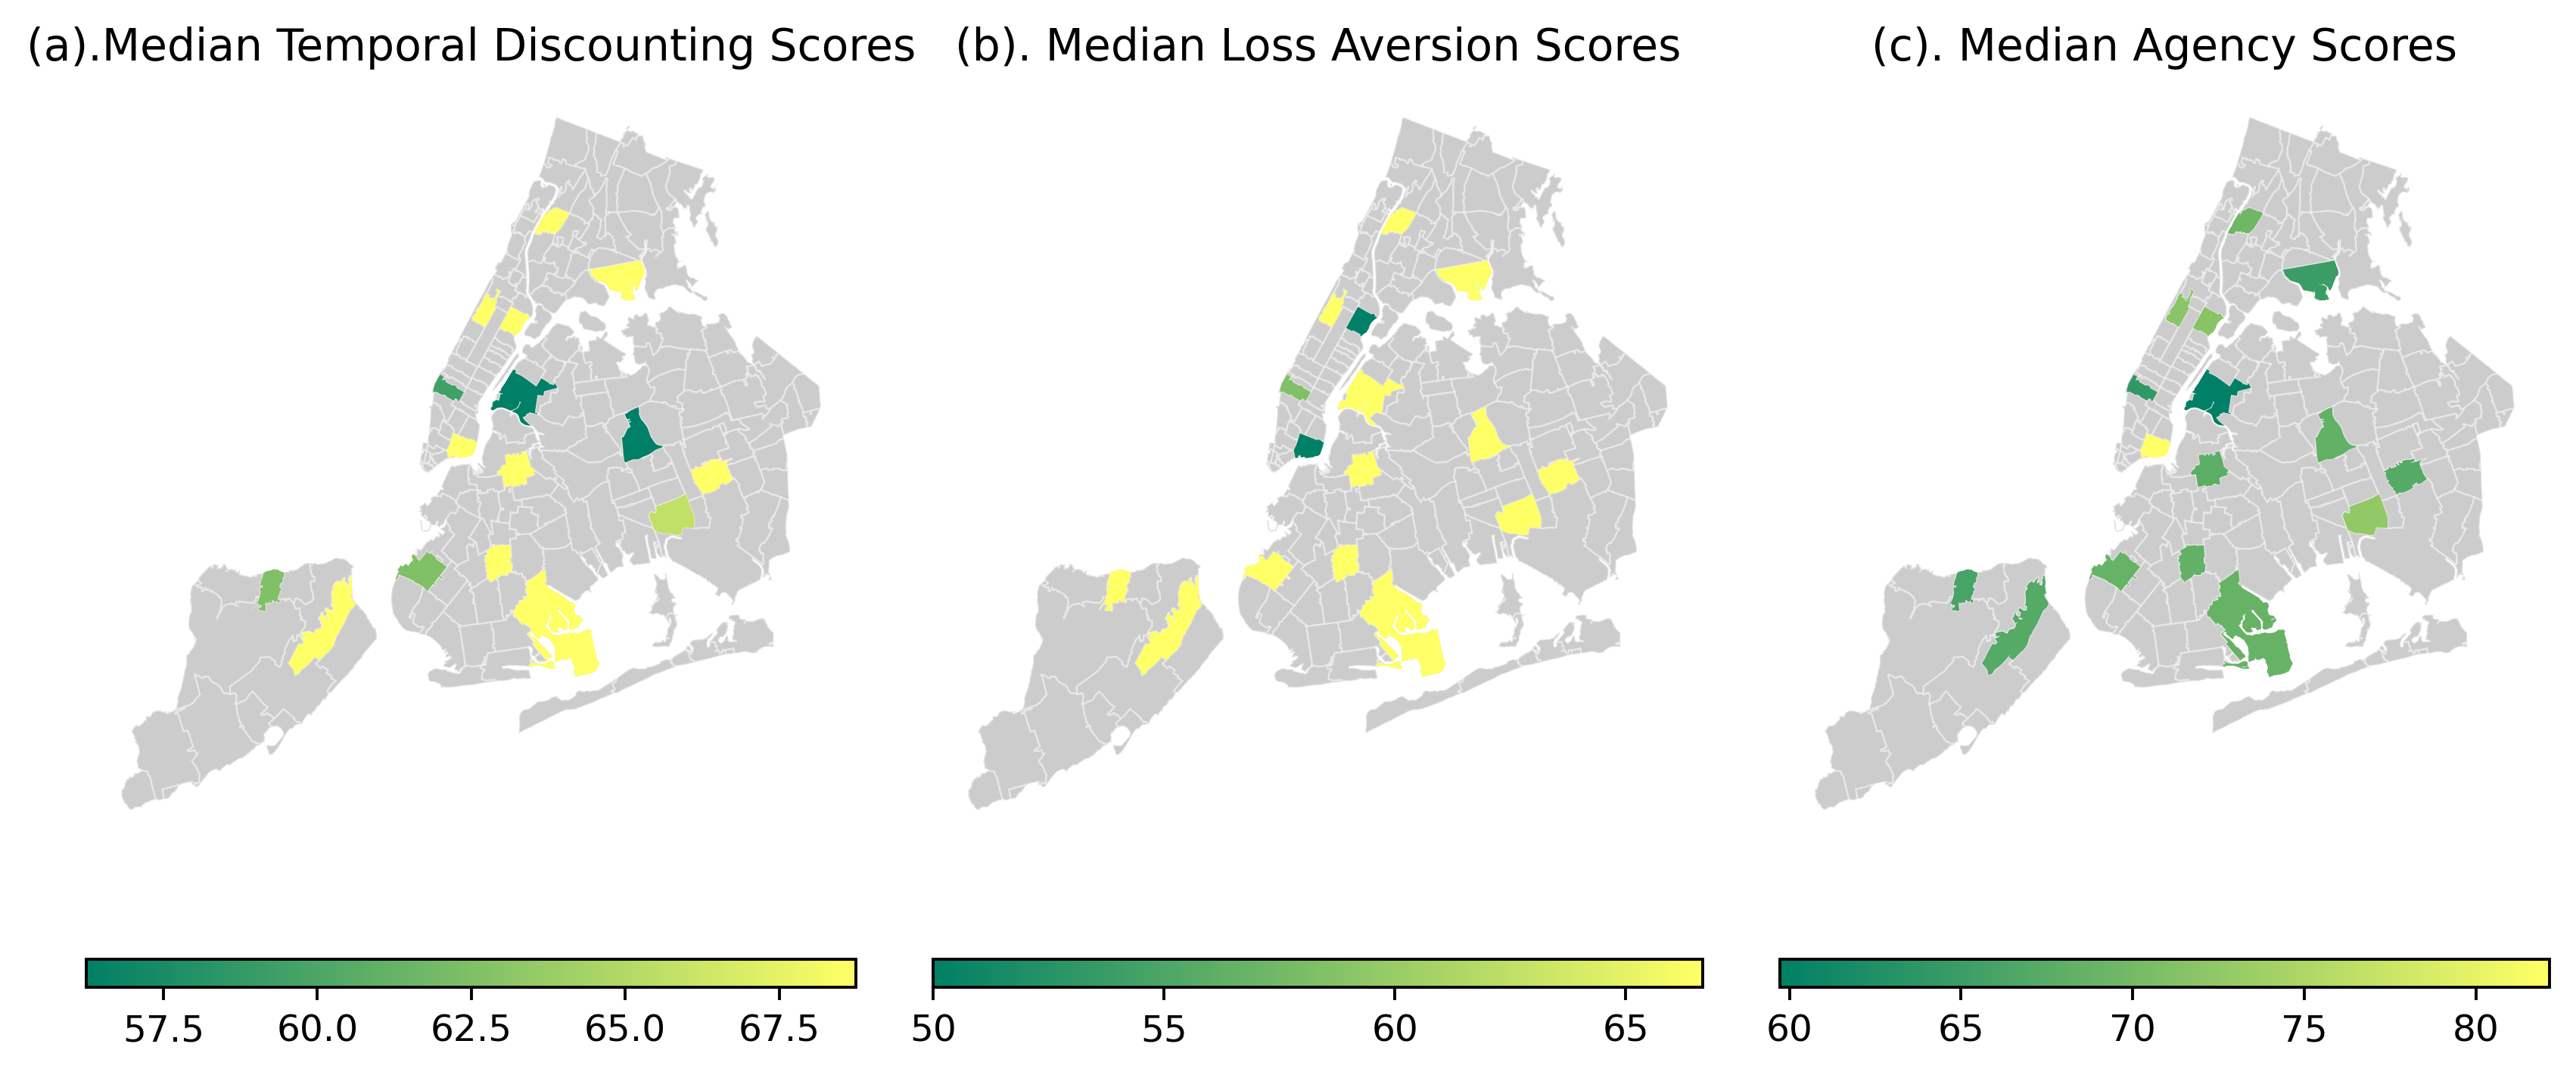

In [12]:
dpi = 350
figsize = (12, 5)  # inches
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

fig = plt.figure(figsize=figsize,dpi = dpi)  
# gs = gridspec.GridSpec(1, 3, height_ratios=[1], hspace=0.3, wspace=0.1)
gs = gridspec.GridSpec(2, 3, height_ratios=[35, 1], hspace=0., wspace=0.1)  # Adjust height_ratios for plot to colorbar

for idx, (k,v) in enumerate(scores_title_dict.items()):
    print (np.min(visits_scores_wk[visits_scores_wk['week']==0][k]))
    print (np.max(visits_scores_wk[visits_scores_wk['week']==0][k]))
    # ax = plt.subplot(gs[idx // 3, idx % 3])
    ax = fig.add_subplot(gs[0, idx])
    gdf.plot(ax=ax, color='grey', alpha=0.4, edgecolor='white',linewidth=0.5)
    
    # norm = Normalize(vmin=50, vmax=90)
    vmin = gdf_merged[k].min()
    vmax = gdf_merged[k].max()
    norm = Normalize(vmin=vmin, vmax=vmax)
    # norm = Normalize()
    cmap = mpl.cm.summer
    # divnorm = mpl.colors.TwoSlopeNorm(vmin=50., vcenter=60, vmax=90)
    cax = fig.add_subplot(gs[1, idx])
    mapping = gdf_merged[gdf_merged['week']==0].plot(column=k, cmap=cmap,legend=False,  ax=ax)
    
    sm = ScalarMappable(norm=norm, cmap=cmap)

    sm.set_array([])
    plt.colorbar(sm, cax=cax, orientation='horizontal')
    subtitle_text = v
    ax.set_title(subtitle_text)

    
    # gdf_plot = gdf_merged[gdf_merged['week']==0].copy()
    # gdf_plot['centroid'] = gdf_plot.geometry.centroid
    # for idx, row in gdf_plot.iterrows():
    #     x, y = row['geometry'].exterior.coords.xy
    #     z = np.full_like(x, row['modzcta_count'])
    #     verts = [list(zip(x, y, z))]
    #     poly = Poly3DCollection(verts, alpha=.7, facecolor=cmap(norm(row['modzcta_count'])))
    #     ax.add_collection3d(poly)
    ax.axis('off')
# cax = fig.add_axes([0.93, 0.2, 0.03, 0.6])  # Adjust these values to position the colorbar: [left, bottom, width, height]
# Create a ScalarMappable with the normalization and colormap
# sm = plt.cm.ScalarMappable(cmap='summer', norm=divnorm)
# sm._A = []  # This is a workaround for empty ScalarMappable
# Add the colorbar to the figure
# fig.colorbar(sm, cax=cax, orientation='vertical')
# Save each frame to a file
filename = f'../results/plots_maps/scores_png/scores.png'
# plt.savefig(filename, bbox_inches='tight',pad_inches=0,dpi=dpi)
# plt.close()

In [19]:
import geopandas as gpd
import pydeck as pdk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from pyproj import Transformer

my_gdf = gdf_merged[gdf_merged['week']==0].copy()
projected_gdf = my_gdf.to_crs('EPSG:3857')
projected_gdf['centroid'] = projected_gdf.geometry.centroid
centroids_geo = projected_gdf['centroid'].to_crs('EPSG:4326')
centroids_geo_df = centroids_geo.to_frame(name='geometry')
centroids_geo_df['longitude'] = centroids_geo_df.geometry.x
centroids_geo_df['latitude'] = centroids_geo_df.geometry.y

k = 'modzcta_count'
color_k = 'regulated_tdscores_median'


# Extract relevant data for pydeck
# my_gdf = my_gdf[my_gdf.geometry.type == "Polygon"]
# my_gdf['centroid'] = my_gdf.geometry.centroid

# Extract relevant data for pydeck
df = pd.DataFrame({
    "longitude": centroids_geo_df['longitude'],
    "latitude": centroids_geo_df['latitude'],
    k: my_gdf[k],
    color_k: my_gdf[color_k]
})



# Set up the color map and normalization
vmin = df[k].min()
vmax = df[k].max()
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = plt.cm.coolwarm

# Define a function to map normalized values to colors
def color_mapper(value):
    normalized_value = norm(value)
    return cmap(normalized_value)

# Apply the color mapper function to the data
df["color"] = df[color_k].apply(lambda x: color_mapper(x))

# Convert color to a format that pydeck can understand
df["color"] = df["color"].apply(lambda c: [int(255*i) for i in c[:3]])

# Define a Pydeck layer
layer = pdk.Layer(
    'HexagonLayer',
    df,
    get_position=["longitude", "latitude"],
    get_color="color",
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 3000],
    extruded=True,
    coverage=1,
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=df["longitude"].mean(),
    latitude=df["latitude"].mean(),
    zoom=10,
    min_zoom=1,
    max_zoom=15,
    pitch=45,
    bearing=0,
)

# Create the deck.gl map
# r = pdk.Deck(
#     layers=[layer],
#     initial_view_state=view_state,
#     tooltip={"text": f"{k}: {{ {k} }}"}
# )
pdk.Deck(layers=[layer], initial_view_state=view_state)

# Save to HTML
r.to_html("3d_map.html")

TypeError: vars() argument must have __dict__ attribute

In [124]:
UK_ACCIDENTS_DATA = 'https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/3d-heatmap/heatmap-data.csv'

layer = pdk.Layer(
    'HexagonLayer',  # `type` positional argument is here
    UK_ACCIDENTS_DATA,
    get_position=['lng', 'lat'],
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 3000],
    extruded=True,
    coverage=1)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=-1.415,
    latitude=52.2323,
    zoom=6,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

# Combined all of it and render a viewport
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('hexagon-example.html')

In [94]:
UK_ACCIDENTS_DATA

'https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/3d-heatmap/heatmap-data.csv'